# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

- Saya memilih dataset melalui public repositori Kaggle yang berjudul "Game Recommendations on Steam" oleh Anton Kozyriev. Dataset ini memiliki 3 entities, diantaranya games.csv, users.csv, recommendations.csv. Pada kesempatan ini saya hanya menggunakan games.csv yang by record memiliki 50.000 baris. Hal ini tentunya sangat banyak jika semua baris data digunakan, kedepannya saya hanya akan mengambil 5000 baris data untuk submission machine learning ini.
- Terdapat 10 kolom Fitur, dengan campuran tipe data Kategorikal dan Numerikal.

Sumber : https://www.kaggle.com/datasets/antonkozyriev/game-recommendations-on-steam

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [18]:
dataset_path = 'data/games.csv'
df = pd.read_csv(dataset_path)

# Mengambil 5000 data acak
subdata_df = df.sample(n=5000, random_state=100)
subdata_path = 'data/subdata.csv'
subdata_df.to_csv(subdata_path, index=False)

data = pd.read_csv("data/subdata.csv")

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [19]:
data.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,1281610,HEX Hacking Simulator,2020-07-31,True,False,False,Mostly Positive,70,17,9.99,9.99,0.0,True
1,1204700,Pangea Survival,2020-08-21,True,False,False,Mostly Positive,71,67,9.99,9.99,0.0,True
2,1166290,Death and Taxes,2020-02-20,True,True,True,Very Positive,88,3454,12.99,12.99,0.0,True
3,396820,Mass Destruction,2015-08-24,True,False,False,Mixed,60,10,4.99,4.99,0.0,True
4,1333490,Dead Event,2021-11-08,True,False,False,Very Positive,86,100,2.99,2.99,0.0,True


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          5000 non-null   int64  
 1   title           5000 non-null   object 
 2   date_release    5000 non-null   object 
 3   win             5000 non-null   bool   
 4   mac             5000 non-null   bool   
 5   linux           5000 non-null   bool   
 6   rating          5000 non-null   object 
 7   positive_ratio  5000 non-null   int64  
 8   user_reviews    5000 non-null   int64  
 9   price_final     5000 non-null   float64
 10  price_original  5000 non-null   float64
 11  discount        5000 non-null   float64
 12  steam_deck      5000 non-null   bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 371.2+ KB


In [21]:
data.describe()

,app_id,positive_ratio,user_reviews,price_final,price_original,discount
count,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.048544e+06,77.079600,1884.544800,8.436248,8.680356,5.909200
std,6.150053e+05,18.174029,20818.973697,10.872325,11.115015,19.100249
min,2.800000e+02,0.000000,10.000000,0.000000,0.000000,0.000000
25%,5.120700e+05,67.000000,19.000000,0.990000,0.990000,0.000000
50%,9.786700e+05,81.000000,49.000000,4.990000,4.990000,0.000000
75%,1.513448e+06,91.000000,220.000000,10.990000,11.990000,0.000000
max,2.576790e+06,100.000000,985819.000000,199.990000,199.990000,90.000000


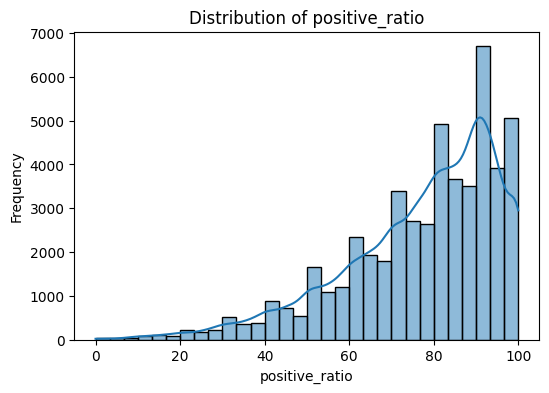

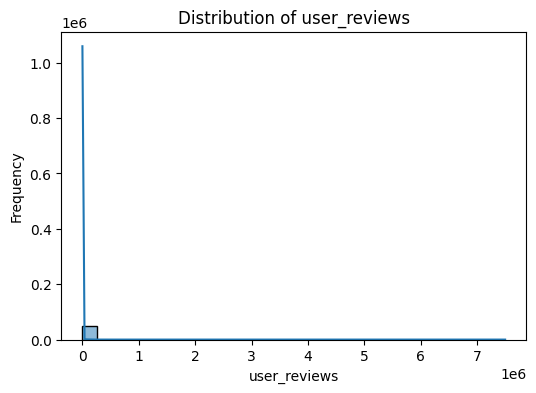

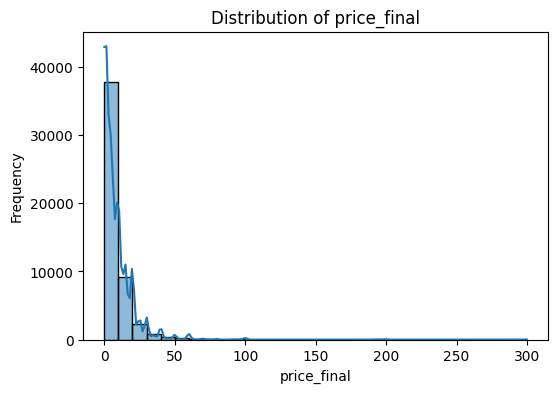

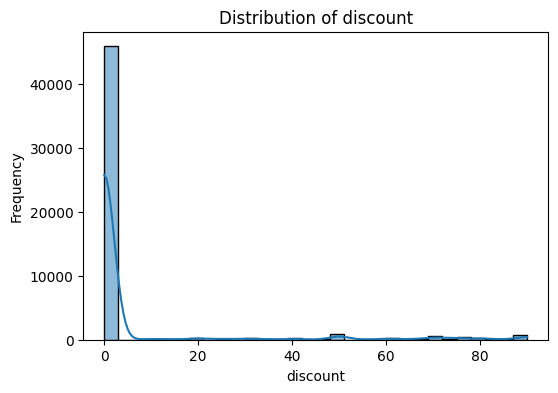

In [31]:
# Distribusi numerik melalui histofram
numerical_columns = ['positive_ratio', 'user_reviews', 'price_final', 'discount']
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


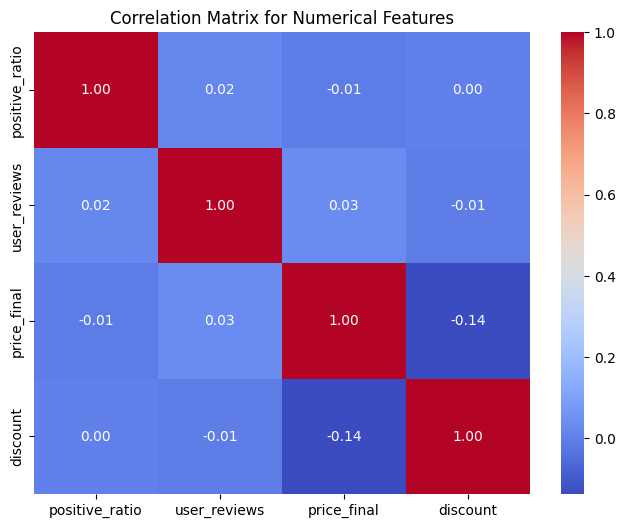

In [32]:
#Correlation matrix

plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Matrix for Numerical Features')
plt.show()

# **5. Data Preprocessing**

C:\Users\Vrooh\AppData\Local\Temp\ipykernel_21268\3280539424.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='viridis')


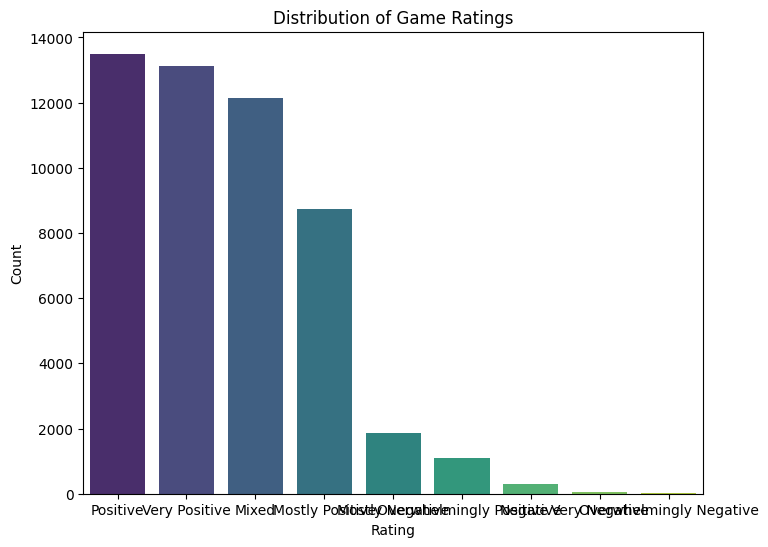

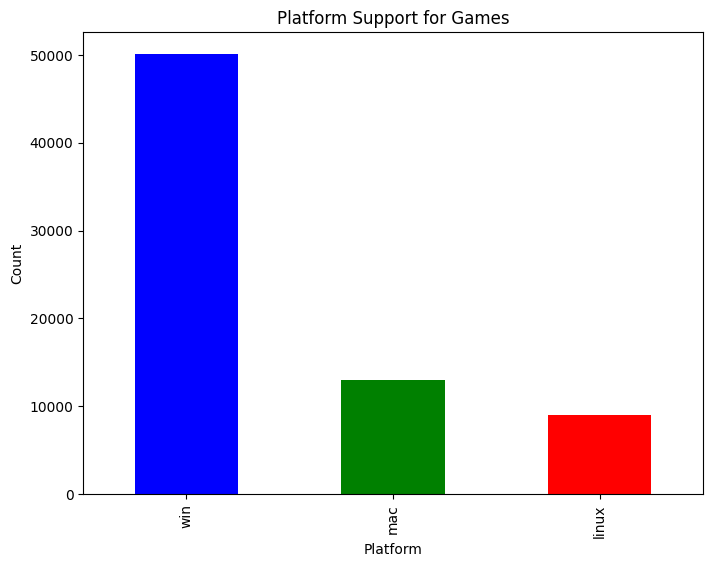

In [33]:
# Distribusi kategori rating
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='viridis')
plt.title('Distribution of Game Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Platform
platform_support = df[['win', 'mac', 'linux']].sum()
platform_support.plot(kind='bar', figsize=(8, 6), color=['blue', 'green', 'red'])
plt.title('Platform Support for Games')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.show()


Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [23]:
data['date_release'] = pd.to_datetime(data['date_release'])

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [24]:
#Type your code here

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [25]:
#Type your code here

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [26]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [27]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [28]:
#Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.